In [1]:
from tensorflow import keras
(train_input,train_target),(test_input,test_target)=\
    keras.datasets.fashion_mnist.load_data()

print(train_input.shape,train_target.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


In [2]:
print(test_input.shape,test_target.shape)

(10000, 28, 28) (10000,)


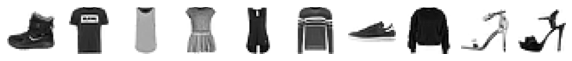

In [4]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i],cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [5]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [7]:
train_scaled=train_input/255.0 #각 픽셀은 0~255 사이의 정수값을 가짐. 따라서 255로 나누어 0~1 사이의 값으로 정규화함.
print(train_input.shape) #샘플개수 60000개, 28*28의 2차원 배열

(60000, 28, 28)


In [8]:
train_scaled=train_scaled.reshape(-1,28*28) #28*28 이미지 크기에 맞게 1차원으로 변형
print(train_scaled.shape) #샘플개수 60000개, 784픽셀

(60000, 784)


In [11]:
#로지스틱 회귀로 패션 아이템 분류하기
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
import numpy as np

sc=SGDClassifier(loss='log',max_iter=5,random_state=42)
scores=cross_validate(sc,train_scaled,train_target,n_jobs=-1)
print(np.mean(scores['test_score']))

0.8192833333333333


In [13]:
#인공신경망으로 모델 만들기
from sklearn.model_selection import train_test_split
train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42) #test_size=검증세트 20% (훈련세트 80%)
dense=keras.layers.Dense(10,activation='softmax',input_shape=(784,))
model=keras.Sequential(dense) #모델

#인공신경망으로 패션 아이템 분류하기
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled,train_target,epochs=5) #훈련
model.evaluate(val_scaled,val_target)#평가

Epoch 1/5
1200/1200 [==============================] - 1s 937us/step - loss: 0.6365 - accuracy: 0.7853: 0s - l - ETA: 0s - loss: 0.6534 - accuracy: 0.77 - ETA: 0s - loss: 0.6469 - accuracy: 
Epoch 2/5
1200/1200 [==============================] - 1s 922us/step - loss: 0.4917 - accuracy: 0.8359
Epoch 3/5
1200/1200 [==============================] - 1s 914us/step - loss: 0.4659 - accuracy: 0.8442
Epoch 4/5
1200/1200 [==============================] - 1s 939us/step - loss: 0.4517 - accuracy: 0.8486
Epoch 5/5
300/300 [==============================] - 0s 777us/step - loss: 0.4289 - accuracy: 0.8619


[0.42889267206192017, 0.8618749976158142]

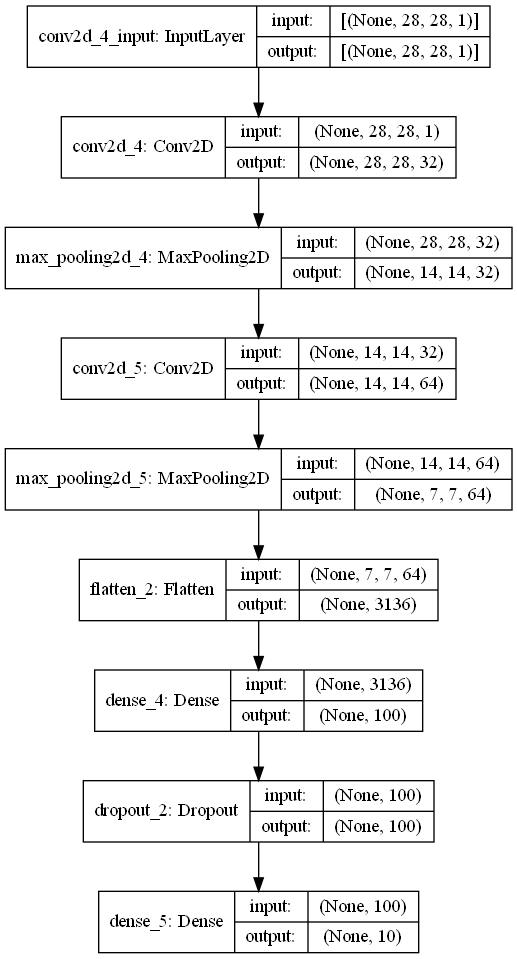

In [3]:
#CNN
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

(train_input,train_target),(test_input,test_target)=\
keras.datasets.fashion_mnist.load_data()

train_scaled=train_input.reshape(-1,28,28,1)/255.0
train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1))) #padding과 strides는 생략해도 됨. 단, padding 기본값은 'valid'임.
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

#model.summary()
plot_model(model,show_shapes=True)